*__LOGISTIC REGRESSION__*

Logistic regression is a classification method meaning that, compared to linear regression, it predicts discrete values, not continous. Classification problems are a very important area of supervised machine learning. Classification is the area that tries to predict which class or category the feature belongs to. Classification can be of two types : 

- binary = where the feature is either one or the other (i.e true or false, yes or no, 1 or 0 ...)
- multiclass = the output of the feauture could be one out of many different classes.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

*FEATURES*

The features will be 20 samples either 0's or 1's 

In [61]:
# arange creates a simple consecutive array i.e 0,1,2,3..19 and it is required to be bi-dimensional, this is why we reshape it 
# in this case the x arr has 1 feature and we have 10 instances of that feature
x = np.arange(20).reshape(-1, 1)
y = np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(f"x bi-dimensional arr: {x} ")
print(f"y one dimensional arr : {y}")

x bi-dimensional arr: [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]] 
y one dimensional arr : [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


*CREATE INSTANCE OF THE MODEL AND TRAIN IT*

With the help of sklearn we can directly create an instance of a premade Logistic regression, once we have done this we have a model ready to be trained. 

We can then train the model by fitting it with our x and y data 

In [62]:
ls = LogisticRegression()
ls.fit(x,y)

LogisticRegression()

*PARAMS*

We are working on a single feature logistic regression which mean that our model will present only B0 and B1 with B0 being the intercept and B1 being the slope.

We can actually take a look at what values logistic regression assigned to them

In [63]:
intercept = ls.intercept_
B1 = ls.coef_
print(f"the intercept value is {intercept}, while B1 value is {B1}")

the intercept value is [6.56822492], while B1 value is [[-1.19423212]]


*MODEL EVALUATION*

What we can do now is take a look at what the actual linear regression values are, meaning what values did the sigmoid function outputted for each sample.

Remember that the sigmoid function will return probabilities in between range [0,1]. 

It is up to us to decide a threshold for which a certain probabilities is classified as 0 or 1. The standard is p(x) >= 0.5 results in 1 and p(x) < 0.5 results in 0

In [64]:
# In this case we are just giving the model the x as input, why?
# The model now is trained and it has the ability to generalize which means that if it now receives a feature as input
# it is has a slight idea of whether it's y corresponding value might be a 0 or a 1 based on what he previosuly was trained on. 

# predict proba returns a matrix witha all the predictions
# the matrix will have the following form :
#   [[ 1- p(x), p(x) ],...] 
# so the first column is the prob of y being 0 and the second one is the prob of y being 1 
ls.predict_proba(x)

array([[1.40231867e-03, 9.98597681e-01],
       [4.61419583e-03, 9.95385804e-01],
       [1.50715418e-02, 9.84928458e-01],
       [4.80839424e-02, 9.51916058e-01],
       [1.42913848e-01, 8.57086152e-01],
       [3.55015613e-01, 6.44984387e-01],
       [6.45008071e-01, 3.54991929e-01],
       [8.57098821e-01, 1.42901179e-01],
       [9.51920792e-01, 4.80792083e-02],
       [9.84929993e-01, 1.50700065e-02],
       [9.95386279e-01, 4.61372080e-03],
       [9.98597826e-01, 1.40217383e-03],
       [9.99574815e-01, 4.25185190e-04],
       [9.99871158e-01, 1.28842293e-04],
       [9.99960965e-01, 3.90345373e-05],
       [9.99988175e-01, 1.18253073e-05],
       [9.99996418e-01, 3.58234655e-06],
       [9.99998915e-01, 1.08522618e-06],
       [9.99999671e-01, 3.28754854e-07],
       [9.99999900e-01, 9.95918628e-08]])

In return matrix it is possible to see i.e that the first value has a higher probability of being 0 rather then being 1 so it is going to be predicted as 0.

__THIS PROBABILITIES ARE NOT TO BE CONFUSED WITH THE ACTUAL PROBABILITY OF THE LOGISTIC REGRESSION BASED ON THE 0.5 THRESHOLD__

*NOW THE ACTUAL PREDICTED VALUES*

In [65]:
# this instead returns directly the evaluation of the model meaning, we can see the predicted o 0r 1
ls.predict(x)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*ACCURACY*

we can now take a look at how well the model performed

In [66]:
ls.score(x,y)

1.0

Obviously the accuracy of the model is perfect given that the pattern of the realization y had no noise and was easy to detect,

__WHAT IF THE REALIZATIONS Y WERE NOT THAT SIMPLY DISTRIBUTED?__

we can try to add some outliners to see how the accuracy changes

In [67]:
x_new = np.arange(20).reshape(-1, 1)
y_new = np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0])

In [68]:
ls.fit(x_new,y_new)
pred = ls.predict(x_new)
acc = ls.score(x_new,y_new)
print(f"The predicted values where : {pred}")
print(f"accuracy of the model is now : {acc}")

The predicted values where : [1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy of the model is now : 0.85


It is possible to see that the model is not able to perfectly recognize outliners resulting a decreased accuracy.

This is not as bad as it seems though, the outliners can be recognised as noise, given that classification acts as a supervised method, just by looking at the input data it is clearly visible that there is a pattern where the first samples are clearly 1's and after the number 7 they all become 0. 

If we'd try to get the model to reach 100% accuracy on this input, we would most probably result in overfitting the model which means that it would be great at recognising the input data but it would not behave great on new data point.

*GRAPHS*

We can now plot on a graph the actual probabilities returned by the sigmoid function

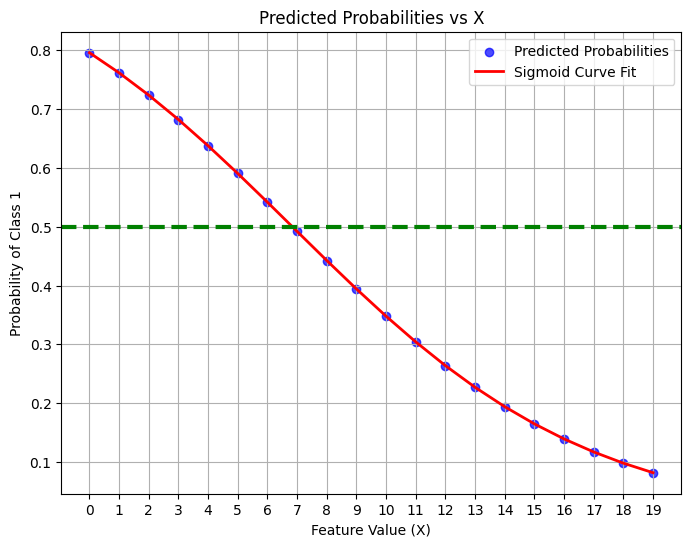

In [69]:
probabilities = ls.predict_proba(x_new)[:, 1] 

plt.figure(figsize=(8, 6))
plt.scatter(x, probabilities, color="blue", alpha=0.7, label="Predicted Probabilities")
plt.plot(x, probabilities, color="red", linewidth=2, label="Sigmoid Curve Fit")
plt.xlabel("Feature Value (X)")
plt.ylabel("Probability of Class 1")
plt.title("Predicted Probabilities vs X")
plt.legend()

x_min, x_max = int(np.floor(x_new.min())), int(np.ceil(x_new.max()))
plt.xticks(ticks=np.arange(x_min, x_max + 1, 1))  

plt.axhline(0.5, color='green', linestyle='--', linewidth=3, label="Threshold at 0.5")

plt.grid(True)
plt.show()

From the plot it is possible to see that values of x < 7 have all probabilities higher than 0.5 while all others have probabilities lower than 0.5. Using 0.5 as threshold, all points x < 7 will be classified as 1 and all point x >= 7 will be classified as 0.

__PLOT THE REAL VS PREDICTED VALUES__

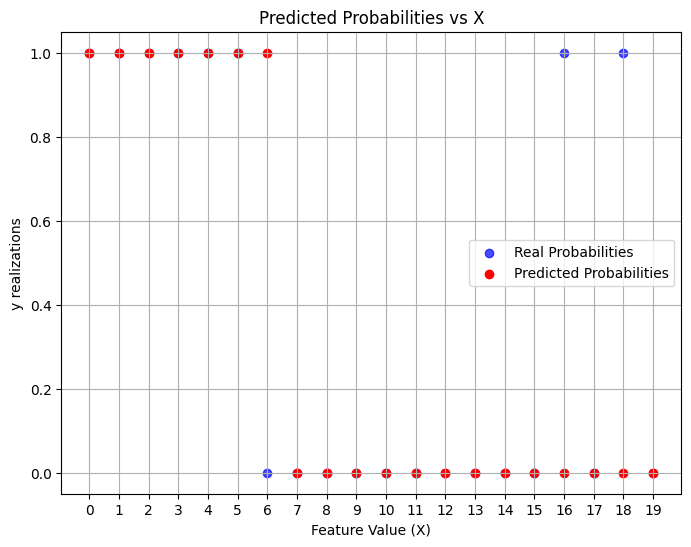

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(x_new, y_new, color="blue", alpha=0.7, label="Real Probabilities")
plt.scatter(x_new,pred, color="red", alpha=1, label="Predicted Probabilities")
plt.xlabel("Feature Value (X)")
plt.ylabel("y realizations")
plt.title("Predicted Probabilities vs X")
plt.legend()

x_min, x_max = int(np.floor(x.min())), int(np.ceil(x.max()))
plt.xticks(ticks=np.arange(x_min, x_max + 1, 1))  

plt.grid(True)
plt.show()

Recalling that the blue dots are the real values, wherever we them it means that the predictions was wrong!! The red dots are covering the blue ones if the prediction was right...